In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [2]:
input_data = pd.read_csv('train.csv')
input_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = input_data['label']
input_data.drop('label', axis=1, inplace=True)
X = input_data
y = pd.get_dummies(y)

In [7]:
classifier = Sequential()
classifier.add(Dense(units = 600, kernel_initializer = 'uniform', activation = 'relu', input_dim = 784))
classifier.add(Dense(units = 400, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 200, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy'])
classifier.fit(X, y, batch_size = 10, epochs = 10)
test_data = pd.read_csv("test.csv")
y_pred = classifier.predict(test_data)

Epoch 1/10
   1/4200 [..............................] - ETA: 9:21 - loss: 0.4078 - accuracy: 0.1000

2024-04-14 12:28:20.546168: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4200/4200 [==============================] - 5s 1ms/step - loss: 0.0294 - accuracy: 0.7851
Epoch 2/10
4200/4200 [==============================] - 4s 1ms/step - loss: 0.0185 - accuracy: 0.8550
Epoch 3/10
4200/4200 [==============================] - 5s 1ms/step - loss: 0.0162 - accuracy: 0.8681
Epoch 4/10
4200/4200 [==============================] - 4s 1ms/step - loss: 0.0149 - accuracy: 0.8758
Epoch 5/10
4200/4200 [==============================] - 4s 1ms/step - loss: 0.0085 - accuracy: 0.9405
Epoch 6/10
4200/4200 [==============================] - 4s 1ms/step - loss: 0.0039 - accuracy: 0.9801
Epoch 7/10
4200/4200 [==============================] - 5s 1ms/step - loss: 0.0032 - accuracy: 0.9832
Epoch 8/10
4200/4200 [==============================] - 5s 1ms/step - loss: 0.0027 - accuracy: 0.9857
Epoch 9/10
4200/4200 [==============================] - 4s 1ms/step - loss: 0.0023 - accuracy: 0.9877
Epoch 10/10
875/875 [==============================] - 1s 732us/step


## Image Classification Using CNNs

In [8]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from Load_and_Preprocess import *

In [9]:
x_train,x_test,y_train,y_test, input_shape = load_and_preprocess()
num_classes=10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11490434/11490434 [==============================] - 7s 1us/step
Epoch 1/12
469/469 [==============================] - 25s 52ms/step - loss: 2.2831 - accuracy: 0.1546 - val_loss: 2.2545 - val_accuracy: 0.4065
Epoch 2/12
469/469 [==============================] - 25s 54ms/step - loss: 2.2384 - accuracy: 0.2664 - val_loss: 2.1998 - val_accuracy: 0.5811
Epoch 3/12
469/469 [==============================] - 26s 55ms/step - loss: 2.1803 - accuracy: 0.3716 - val_loss: 2.1263 - val_accuracy: 0.6617
Epoch 4/12
469/469 [==============================] - 27s 58ms/step - loss: 2.1016 - accuracy: 0.4483 - val_loss: 2.0252 - val_accuracy: 0.7077
Epoch 5/12
469/469 [==============================] - 28s 61ms/step - loss: 1.9930 - accuracy: 0.5138 - val_loss: 1.8856 - val_accuracy: 0.7356
Epoch 6/12
469/469 [==============================] - 27s 58ms/step - loss: 1.8508 - accuracy: 0.5594 - val_loss: 1.7028 - val_accuracy: 0.7607
Epoch 7/12
469/469 [==============================] - 32s 67ms/step - l

## Image Classification Using Machine Learning Approaches

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


### Load Training Data

In [6]:
# Load training data
train = pd.read_csv('train.csv')

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

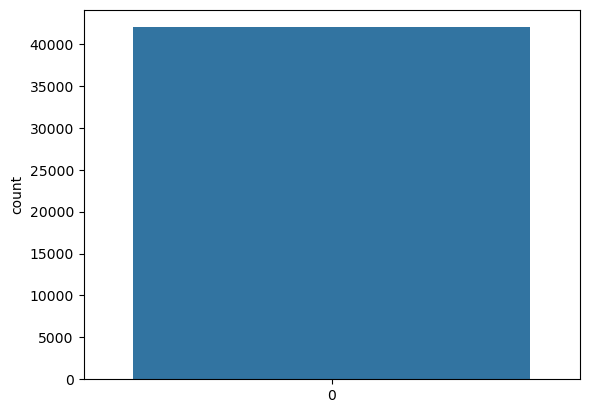

In [7]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [2]:
# Separate labels (y) and features (X)
y = data['label']
data.drop('label', axis=1, inplace=True)
X = data

# Check dimensions of X and y
print("Training data shape (X):", X.shape)
print("Labels shape (y):", y.shape)

Training data shape (X): (42000, 784)
Labels shape (y): (42000,)


### Load Testing Data

In [ ]:
# Load testing data
X_test = pd.read_csv('test.csv')

# Check dimensions of X_test
print("Testing data shape (X_test):", X_test.shape)

### Initialize models

In [ ]:
# Initialize models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
svc = LinearSVC()

### Fit models

In [ ]:
# Fit models
model_logreg = logreg.fit(X, y)
model_dt = dt.fit(X, y)
model_svc = svc.fit(X, y)


### Predictions

In [ ]:
# Predictions
pred_logreg = model_logreg.predict(X_test)
pred_dt = model_dt.predict(X_test)
pred_svc = model_svc.predict(X_test)

### Evaluate model accuracy

In [ ]:
# Evaluate model accuracy
print("Decision Tree Accuracy:", accuracy_score(pred_dt, y) * 100)
print("Logistic Regression Accuracy:", accuracy_score(pred_logreg, y) * 100)
print("Support Vector Machine Accuracy:", accuracy_score(pred_svc, y) * 100)